In [23]:
#Import the library
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from six import StringIO  
from IPython.display import Image  
import pydotplus
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import KFold

In [2]:
#Load the data 
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab

Saving winequality-red.csv to winequality-red.csv


In [5]:
#Load the data into the data frame
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [6]:
wine_data.shape

(1599, 12)

In [7]:
#Check for na or missing data
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

data Visualization

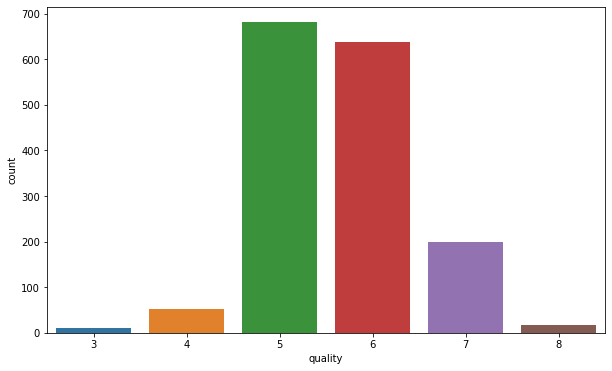

In [8]:
fig = plt.figure(figsize = (10,6))
sns.countplot(data=wine_data, x='quality')

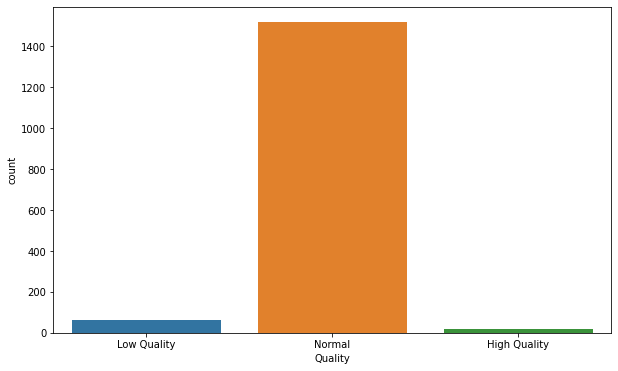

In [9]:
wine_data.loc[wine_data['quality']<=4, "Quality"]="Low Quality"
wine_data.loc[(wine_data['quality']>=5)&(wine_data['quality']<=7), "Quality"]="Normal"
wine_data.loc[wine_data['quality']>=8, "Quality"]="High Quality"

fig = plt.figure(figsize = (10,6))
sns.countplot(data=wine_data, x='Quality', order=['Low Quality','Normal','High Quality'])

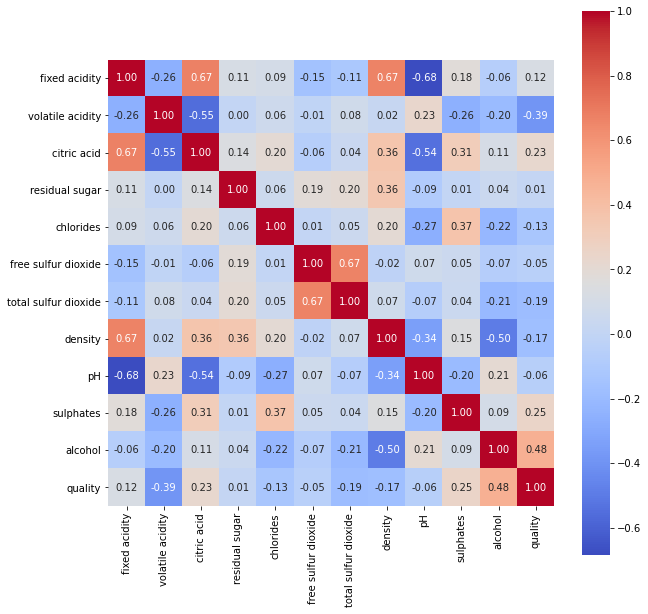

In [10]:
corr = wine_data.corr(method = "pearson")
# corr = wine_data.corr(method = "spearman")
# corr = wine_data.corr(method = "kendall")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, ax=ax, annot=True, fmt=".2f")

Classification

In [12]:
X = wine_data[['fixed acidity',
               'volatile acidity',
               'citric acid',
               'residual sugar',
               'chlorides',
               'free sulfur dioxide',
               'total sulfur dioxide',
               'density',
               'pH',
               'sulphates',
               'alcohol']]

y = wine_data['quality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [16]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [17]:
models=[("Logistic Regression",LogisticRegression()),
        ("Linear Discriminant Analysis",LinearDiscriminantAnalysis()),
        ("Decision Tree",DecisionTreeClassifier()),
        ("Random Forest",RandomForestClassifier()),
        ("Extra Trees",ExtraTreesClassifier()),
        ("Gradient Boostin",GradientBoostingClassifier()),
        ("KNeighbors",KNeighborsClassifier()),
        ("SVM",SVC()),
        ("Gaussian Naive Bayes",GaussianNB()),
        ("Ada Boost",AdaBoostClassifier())]

    
for name, model in models:
    results = cross_val_score(model, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    print(f"\x1b[94m{name}\x1b[0m: \x1b[95m{results.mean():.4f}\x1b[0m ± {results.std():.4f}")

Logistic Regression: 0.5784 ± 0.0344
Linear Discriminant Analysis: 0.5850 ± 0.0393
Decision Tree: 0.6255 ± 0.0384
Random Forest: 0.6704 ± 0.0374
Extra Trees: 0.6917 ± 0.0346
Gradient Boostin: 0.6498 ± 0.0308
KNeighbors: 0.4856 ± 0.0264
SVM: 0.4996 ± 0.0347
Gaussian Naive Bayes: 0.5372 ± 0.0215
Ada Boost: 0.4945 ± 0.0473


In [18]:
for name, model in models:
    kfold = KFold(n_splits=10)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"\x1b[94m{name}\x1b[0m: \x1b[95m{results.mean():.4f}\x1b[0m ± {results.std():.4f}")

Logistic Regression: 0.5769 ± 0.0522
Linear Discriminant Analysis: 0.5909 ± 0.0313
Decision Tree: 0.6100 ± 0.0353
Random Forest: 0.6903 ± 0.0438
Extra Trees: 0.6873 ± 0.0435
Gradient Boostin: 0.6417 ± 0.0291
KNeighbors: 0.4886 ± 0.0305
SVM: 0.4996 ± 0.0562
Gaussian Naive Bayes: 0.5320 ± 0.0262
Ada Boost: 0.5041 ± 0.0780


In [19]:
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
et_predict = et.predict(X_test)

print(f"Тrain: {et.score(X_train, y_train)*100} - Тest: {et.score(X_test, y_test)*100}")

rfc_eval = cross_val_score(estimator = et, X = X_train, y = y_train, cv = 10)
print("cross_val_score: ", rfc_eval.mean()*100)

et_acc_score = accuracy_score(y_test, et_predict)
print("accuracy_score: ", et_acc_score*100)

Тrain: 100.0 - Тest: 69.16666666666667
cross_val_score:  68.73039215686275
accuracy_score:  69.16666666666667


In [20]:
cr = classification_report(y_test, et_predict)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.69      0.80      0.74        96
           6       0.72      0.70      0.71       110
           7       0.60      0.55      0.57        22
           8       0.00      0.00      0.00         3

    accuracy                           0.69       240
   macro avg       0.34      0.34      0.34       240
weighted avg       0.66      0.69      0.68       240



Text(0.5, 33.0, 'Predicted label')

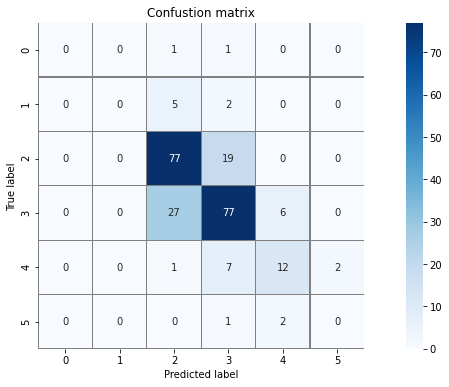

In [21]:
cm=confusion_matrix(y_test, et_predict)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, linewidths=0.01, linecolor='grey')
plt.title('Confustion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

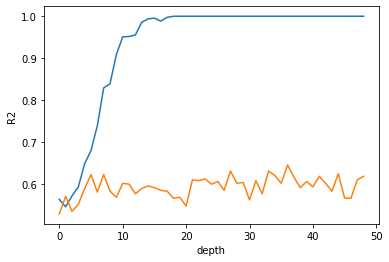

In [43]:
#Learning curves
train_acc =[]
test_acc=[]

for depth in range(1,50):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    dtree.fit(X_train,y_train)
    y_pred_Train = dtree.predict(X_train) #Predictions
    y_pred_Test = dtree.predict(X_test) #Predictions
    train_acc.append(metrics.accuracy_score(y_train,y_pred_Train))
    test_acc.append(metrics.accuracy_score(y_test, y_pred_Test))

plt.plot(train_acc)
plt.plot(test_acc)
plt.ylabel('R2')
plt.xlabel('depth')
plt.show()